# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [25]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

In [26]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")


In [27]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")
px.set_mapbox_access_token(map_box_api)


# Import Data

In [28]:
# Import the CSVs to Pandas DataFrames
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("toronto_neighbourhoods_coordinates.csv")
neighbourhood_locations = pd.read_csv(file_path)

file_path = Path("dwelling_units.csv")
dwelling_units = pd.read_csv(file_path, index_col="year")



- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [29]:
# Getting the data from the top 10 expensive neighbourhoods
top10_expensive = to_data.sort_values('average_house_value', ascending=False).head(10)

# Calculate the mean number of dwelling types units per year
dwelling_types = to_data.groupby(['year','neighbourhood']).mean()
dwelling_types.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1, inplace= True)
# Calculate the average monthly shelter costs for owned and rented dwellings
avg_monthlyCost = to_data[['shelter_costs_owned','shelter_costs_rented']].groupby('year').mean()

### Panel Visualization Functions

In [30]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    file_path = Path("toronto_neighbourhoods_coordinates.csv")
    neighbourhood_locations = pd.read_csv(file_path)

    avg_Housevalue_eachNeighbourhood = to_data.groupby([to_data["neighbourhood"]]).mean()
    avg_Housevalue_eachNeighbourhood = avg_Housevalue_eachNeighbourhood.reset_index()

    avgValues_bylocation = neighbourhood_locations.merge(avg_Housevalue_eachNeighbourhood, how="outer")
    fig = px.scatter_mapbox(
        avgValues_bylocation,
        lat="lat",
        lon="lon",
        hover_name="neighbourhood",
        height=500,
        size="average_house_value",
        color="average_house_value",
        title="Average House Values in Toronto",
        color_continuous_scale=px.colors.cyclical.IceFire, 
        zoom=9,
        size_max=15
        )
    
    plotly_panel = pn.pane.Plotly(fig)
    plotly_panel._updates = True
    return plotly_panel

    

In [31]:
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = plt.figure()
    data = data.plot.bar(color=color)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    
    plt.show()
    return pn.pane.Matplotlib(fig, tight=True)
    

In [32]:
    
def create_line_chart2(data, title, xlabel, ylabel, color):

    """
    Create a line chart based in the data argument.
    """
        
    fig = plt.figure()
    data = data.plot.line(color=color)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel,fontsize=14)
    
    plt.show()
    return pn.pane.Matplotlib(fig, tight=True)



In [33]:
def average_house_value():
    """Average house values per year."""
    

    avg_house_value = to_data[['average_house_value']].groupby('year').mean()
    avg_house_value.plot.line(title="Avg. house value per year")

In [34]:
    
def average_value_by_neighbourhood():
    
    """Average house values by neighbourhood."""
    avg_houseValue_neighbour = to_data.reset_index()
    average_value_by_neighbourhood = avg_houseValue_neighbour[['year','neighbourhood','average_house_value']]    
    avg_value_plot = average_value_by_neighbourhood.hvplot(x="year", y="average_house_value", groupby= "neighbourhood", yformatter='$%.1f')
    return avg_value_plot


In [35]:
def number_dwelling_types():
    """Number of dwelling types per year"""
    
    # YOUR CODE HERE!
    dwelling_types = to_data.groupby(['year','neighbourhood']).mean()
    dwelling_types.drop(['average_house_value', 'shelter_costs_owned', 'shelter_costs_rented'], axis=1, inplace= True)
    dwelling_types = dwelling_types.reset_index(['neighbourhood','year'])
    plot_dwelling_types = dwelling_types.hvplot.bar(x='year', groupby='neighbourhood', rot=90, height=500, xlabel='Year', ylabel='Dwelling Type Units')
    return plot_dwelling_types
 

In [36]:
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!

def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    top10_expensive = to_data.sort_values('average_house_value', ascending=False).head(10)
    plot_top10 = top10_expensive.hvplot.bar( x='neighbourhood', y='average_house_value', rot=90, height=700, width=700,xlabel='Neighbourhood', ylabel='Avg. House value', yformatter='$%.1f', title='Top 10 most expensive neighbourhood')
    return plot_top10
top_most_expensive_neighbourhoods()
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!

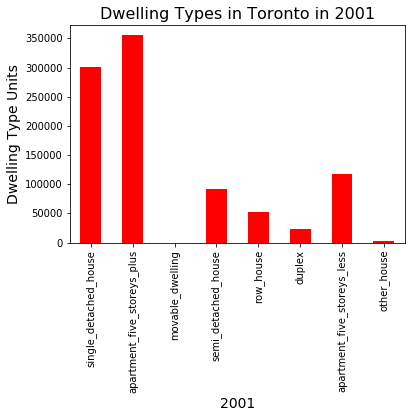

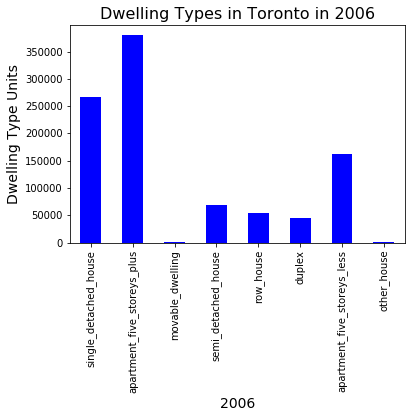

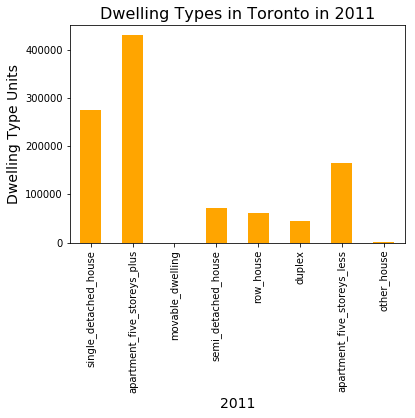

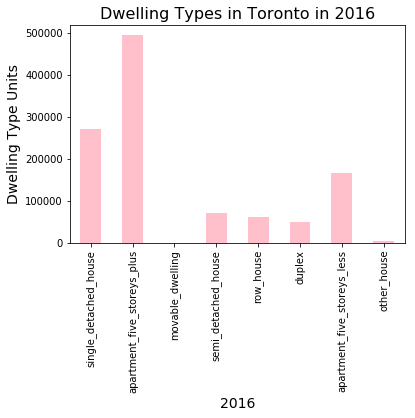

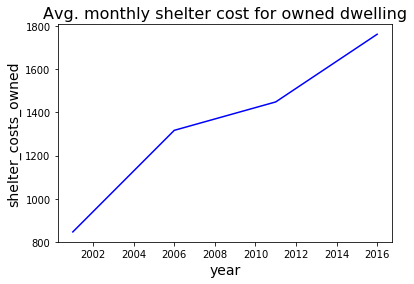

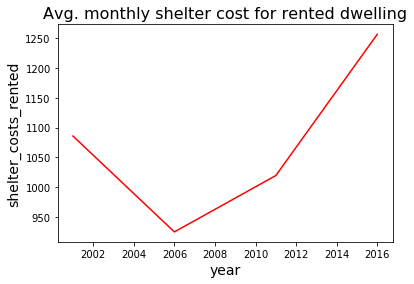

In [37]:
dwelling_2001 = create_bar_chart(dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units","red")
dwelling_2006 = create_bar_chart(dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units","blue")
dwelling_2011 = create_bar_chart(dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units","orange")
dwelling_2016 = create_bar_chart(dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units","pink")

owned_dwelling = create_line_chart2(avg_monthlyCost.iloc[:,0],"Avg. monthly shelter cost for owned dwelling", "year", "shelter_costs_owned","blue")  
rented_dwelling = create_line_chart2(avg_monthlyCost.iloc[:,1],"Avg. monthly shelter cost for rented dwelling", "year", "shelter_costs_rented","red")


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

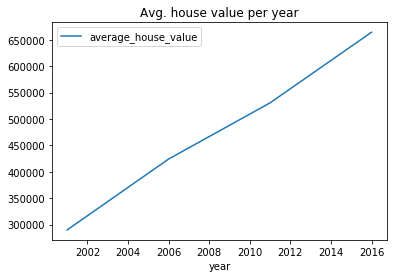

In [38]:
# Create a Title for the Dashboard
title = pn.pane.Markdown("""# Real Estate Analysis of Toronto from 2001 to 2016""", width=800)

# Define a welcome text
    
welcome = pn.pane.Markdown(""" The dashboard provides visual analysis for housing values, dwelling types per neighbourhood and dwelling costs in Toronto, Ontario according to census data from 2001 to 2016.
                         You can navigate through the tabs above to explore more details about the evolution of the real estate market on The 6 across these years.""")

# Create a tab layout for the dashboard
# YOUR CODE HERE!


# Create the main dashboard
# YOUR CODE HERE!

tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighbourhood_map())),
    ("Yearly Market Analysis", pn.Column(dwelling_2001, dwelling_2006, dwelling_2011,dwelling_2016)),
    ("Shelter Cost Vs House Vlaue", pn.Column(owned_dwelling, rented_dwelling, average_house_value())),
    ("Neighbourhood Analysis", pn.Column(average_value_by_neighbourhood(),number_dwelling_types())),
    ("Top Expensive Neighbourhood", top_most_expensive_neighbourhoods())
)
dashboard = pn.Column(pn.Row(title), tabs, width=800)

    


## Serve the Panel Dashboard

Traceback (most recent call last):
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/pyviz_comms/__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/viewable.py", line 273, in _on_msg
 doc.unhold()
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 669, in unhold
 self._trigger_on_change(event)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 1180, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/document/document.py", line 1198, in _with_self_as_curdoc
 return f()
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/bokeh/util/callback_manager.py", line 161, in invoke
 callback(attr, old, new)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/reactive.py", line 301, in _comm_change
 self._process_events({attr: new})
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/reactive.py", line 262, in _process_events
 self.param.set_param(**self_events)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1526, in set_param
 self_._batch_call_watchers()
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1665, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 1627, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 520, in caller
 return function()
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/param/parameterized.py", line 351, in _depends
 return func(*args,**kw)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/panel/pane/plotly.py", line 153, in _update_figure_layout
 self._figure.plotly_relayout(self.relayout_data)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/plotly/basedatatypes.py", line 2601, in plotly_relayout
 relayout_changes = self._perform_plotly_relayout(relayout_data)
 File "/Applications/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/plotly/basedatatypes.py", line 2641, in _perform_plotly_relayout
 key_path_str=key_path_str
ValueError: 
Invalid property path 'mapbox._derived' for layout

Column(width=800)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
            [3] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Str(None)
        [3] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
            [1] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                    [1] VSpacer()
        [4] HoloViews(Bars, name='Top Expensive N...)
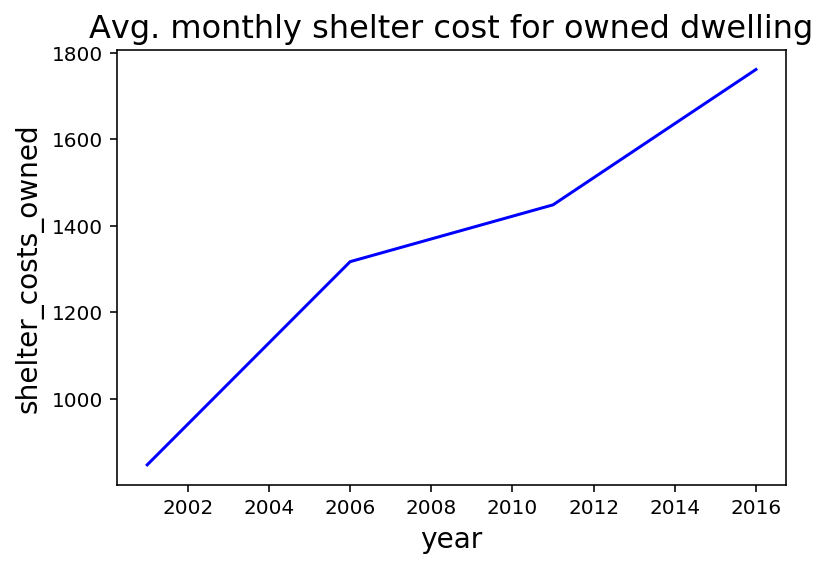
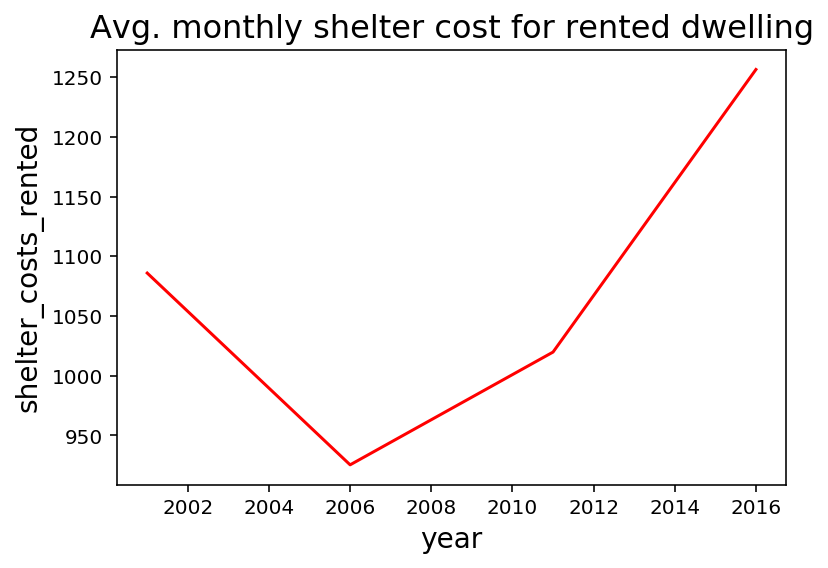
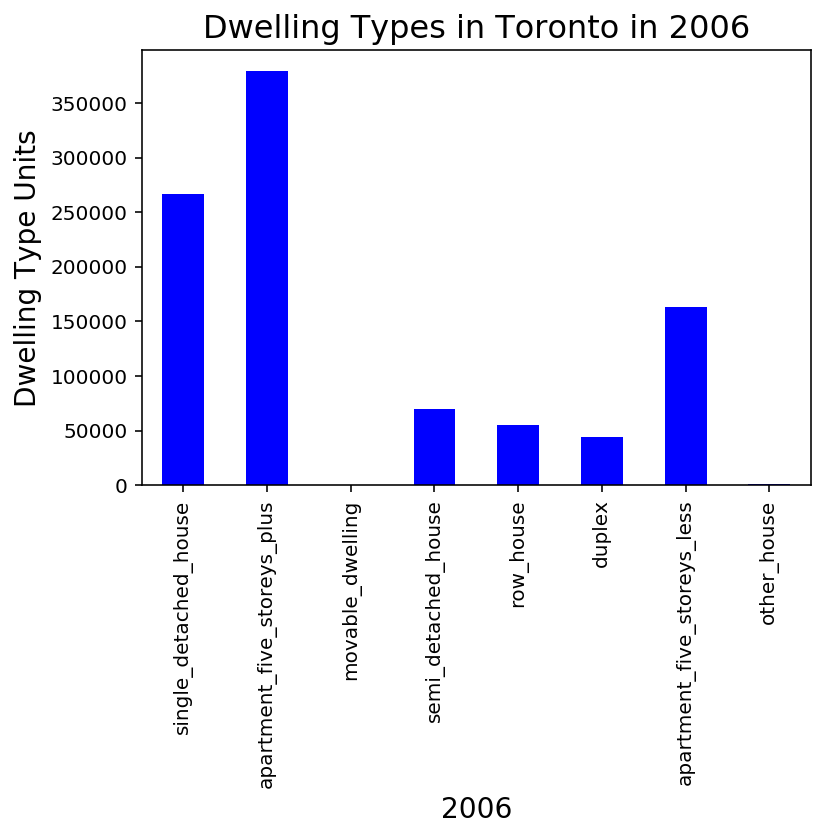
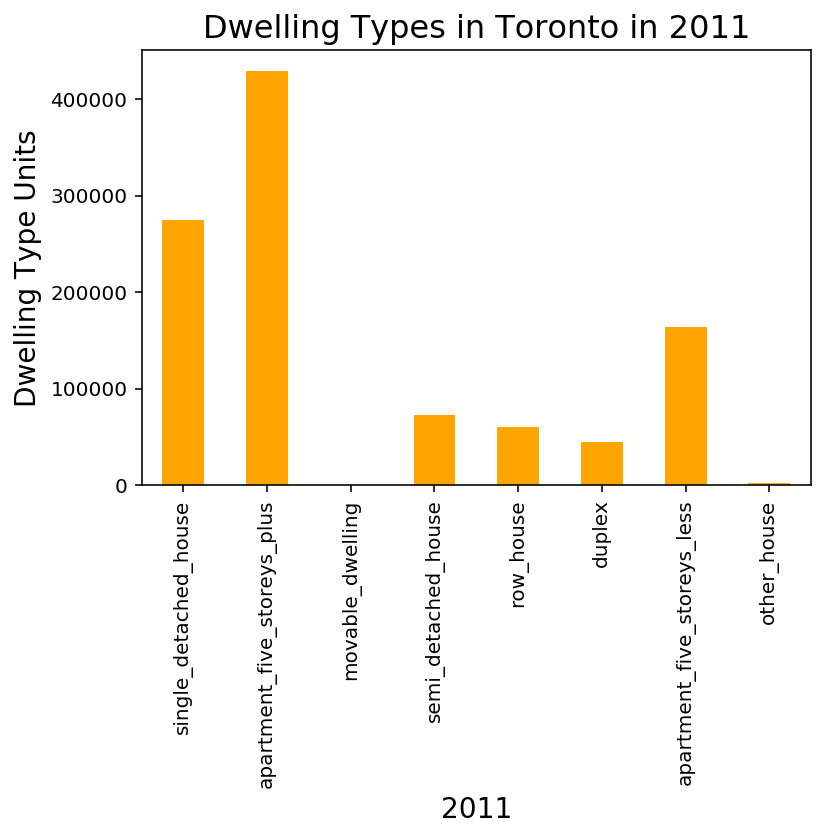
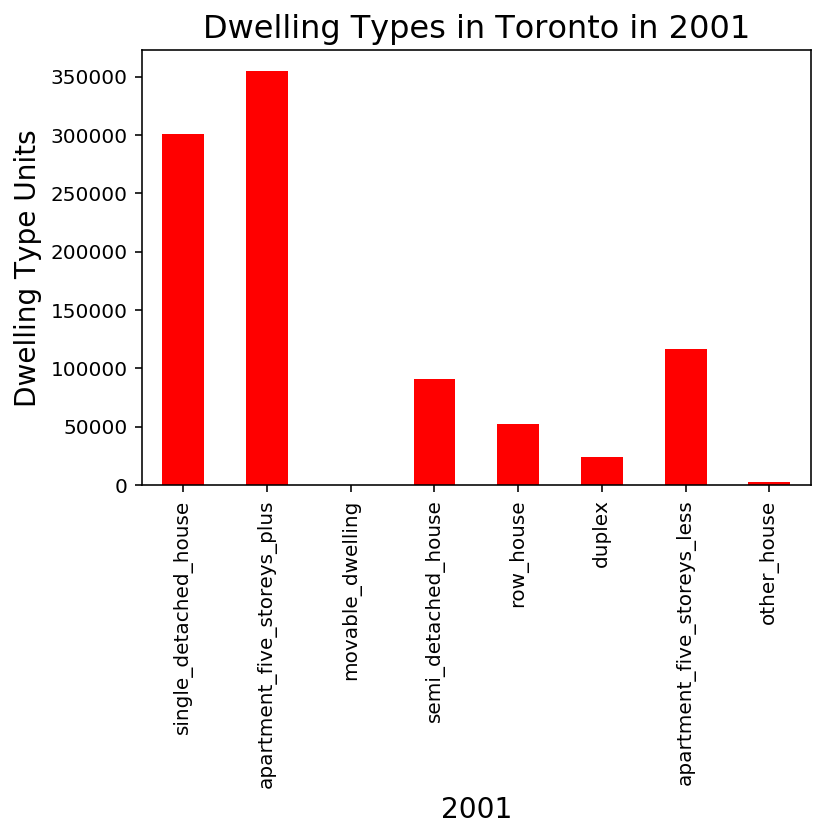
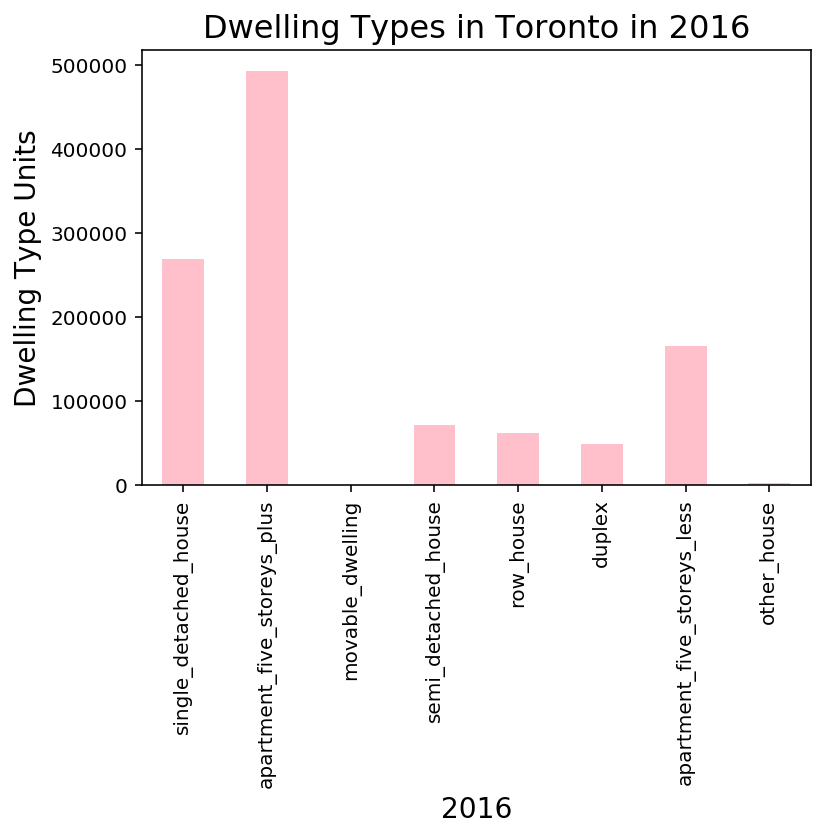

In [39]:

dashboard.servable()



# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [40]:
# neighbourhood_map().show()


In [41]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
# create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [42]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [43]:
# average_house_value()

In [44]:
# average_value_by_neighbourhood()

In [45]:
# number_dwelling_types()

In [46]:
# average_house_value_snapshot()

In [47]:
# top_most_expensive_neighbourhoods()

In [48]:
# sunburts_cost_analysis()


